In [12]:
#importing necessary modeules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

/!reading the dataset csv file as dataframe!/

In [30]:
data=pd.read_csv('leaf.csv')
data.head()

,convex_area,area,eccentricity,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,major_axis_length,minor_axis_length,...,bbox-0,bbox-1,bbox-2,bbox-3,real_images,mean_intensity,std_intensity,25th Percentile,75th Percentile,iqr
0,23427.0,20485.0,0.934899,0.536537,735.209906,654.226395,654.226395,4949.804852,284.225933,100.875443,...,12.0,359.0,344.0,474.0,[[0.84923843 0.84531686 0.84531686 ... 0.47278...,0.580917,0.192535,0.580917,0.192535,-0.388382
1,30003.0,27373.0,0.943648,0.589123,773.150964,152.612426,152.612426,7021.107828,335.257115,110.954079,...,24.0,1073.0,408.0,1194.0,[[0.7786502 0.77472863 0.77472863 ... 0.78649...,0.479318,0.201184,0.479318,0.201184,-0.278133
2,18455.0,16790.0,0.935387,0.588875,514.216032,-96.147467,-96.147467,4088.790459,255.855419,90.477114,...,29.0,648.0,326.0,744.0,[[0.78033176 0.78033176 0.78033176 ... 0.81226...,0.513137,0.233166,0.513137,0.233166,-0.279971
3,24180.0,21619.0,0.924560,0.588721,746.543539,445.554002,445.554002,4756.031947,277.270910,105.650606,...,30.0,89.0,331.0,211.0,[[0.84225137 0.84225137 0.84617294 ... 0.81087...,0.569628,0.203243,0.569628,0.203243,-0.366385
4,27075.0,22336.0,0.938729,0.508967,793.796494,-737.185544,-737.185544,5652.182144,303.620173,104.644391,...,38.0,836.0,373.0,967.0,[[0.78425333 0.78425333 0.78425333 ... 0.74727...,0.525357,0.221646,0.525357,0.221646,-0.303711


1)The area of a leaf is the total surface area of the leaf
2)the convex area of a leaf is the area of the smallest convex polygon that can enclose the leaf 

Removing the duplicate rows 

In [31]:
data[data.duplicated()==1]

,convex_area,area,eccentricity,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,major_axis_length,minor_axis_length,...,bbox-0,bbox-1,bbox-2,bbox-3,real_images,mean_intensity,std_intensity,25th Percentile,75th Percentile,iqr
50,142900.0,127781.0,0.614709,0.694685,13418.904760,-264.501706,-264.501706,8370.764388,463.598546,365.665277,...,0.0,17.0,419.0,456.0,[[0.81032824 0.81032824 0.8142498 ... 0.80556...,0.433235,0.222230,0.433235,0.222230,-0.211005
110,25968.0,24021.0,0.936980,0.590487,767.992950,536.719668,536.719668,5767.895449,305.283112,106.660377,...,387.0,1118.0,726.0,1238.0,[[0.67307333 0.67307333 0.66915176 ... 0.64170...,0.385948,0.197265,0.385948,0.197265,-0.188683
205,5.0,5.0,0.938083,0.555556,0.560000,-0.440000,-0.440000,0.560000,4.000000,1.385641,...,0.0,764.0,3.0,767.0,[[0.54573765 0.54797765 0.55189922]\n [0.52669...,0.543231,0.009048,0.543231,0.009048,-0.534182
206,23.0,21.0,0.739954,0.700000,1.950113,0.702948,0.702948,1.800454,6.427694,4.323635,...,3.0,754.0,9.0,759.0,[[0.57127608 0.57209451 0.56787529 0.5409749 ...,0.531833,0.079305,0.531833,0.079305,-0.452529
207,1.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.0,762.0,5.0,763.0,[[0.52618941]],0.526189,0.000000,0.526189,0.000000,-0.526189
208,51984.0,49602.0,0.802426,0.614099,2415.643063,-94.001312,-94.001312,6775.668295,329.307006,196.514319,...,13.0,102.0,394.0,314.0,[[0.77003412 0.77003412 0.77003412 ... 0.81431...,0.525985,0.183213,0.525985,0.183213,-0.342772
209,43375.0,41147.0,0.808932,0.639962,1983.252026,28.392466,28.392466,5737.268556,302.984707,178.125228,...,32.0,397.0,374.0,585.0,[[0.83391804 0.83391804 0.83391804 ... 0.85520...,0.580146,0.174556,0.580146,0.174556,-0.405590
210,4.0,4.0,0.000000,1.000000,0.250000,0.000000,0.000000,0.250000,2.000000,2.000000,...,90.0,554.0,92.0,556.0,[[0.53679765 0.53958039]\n [0.53847922 0.54071...,0.538894,0.001446,0.538894,0.001446,-0.537448
211,46179.0,44843.0,0.833813,0.682978,2007.051795,-27.216576,-27.216576,6585.059896,324.597516,179.193303,...,420.0,277.0,773.0,463.0,[[0.75434784 0.75434784 0.75042627 ... 0.78236...,0.460024,0.183145,0.460024,0.183145,-0.276879
212,36394.0,34364.0,0.804677,0.639628,1673.525218,-118.347039,-118.347039,4730.104905,275.236053,163.411129,...,431.0,549.0,738.0,724.0,[[0.79302784 0.79302784 0.79302784 ... 0.81712...,0.552566,0.170266,0.552566,0.170266,-0.382301


Count of duplicate rows

In [33]:
data.duplicated().sum()

31

In [35]:
data1=data.drop_duplicates()
data1.to_csv('afterdup.csv',index=False)

Removing redundant rows(irrelevant data)

In [100]:
data2=pd.read_csv('afterdup.csv')
#data2.head()

In [57]:
#removing the redundant rows having convex_area value less than 1000
data2 = data2[data2['convex_area'] >= 1000.0]  
data3=data2
data3.to_csv('afterstep2.csv',index=False)

Handling incomplete data(NULL Values)

In [3]:
data3=pd.read_csv('afterstep2.csv')

In [4]:
data3.isnull().sum()  #there are no null values here so no need to fill values

convex_area            0
area                   0
eccentricity           0
extent                 0
inertia_tensor-0-0     0
inertia_tensor-0-1     0
inertia_tensor-1-0     0
inertia_tensor-1-1     0
major_axis_length      0
minor_axis_length      0
perimeter              0
solidity               0
orientation            0
moments_central-0-0    0
moments_central-0-1    0
moments_central-0-2    0
moments_central-0-3    0
moments_central-1-0    0
moments_central-1-1    0
moments_central-1-2    0
moments_central-1-3    0
moments_central-2-0    0
moments_central-2-1    0
moments_central-2-2    0
moments_central-2-3    0
moments_central-3-0    0
moments_central-3-1    0
moments_central-3-2    0
moments_central-3-3    0
moments_hu-0           0
moments_hu-1           0
moments_hu-2           0
moments_hu-3           0
moments_hu-4           0
moments_hu-5           0
moments_hu-6           0
euler_number           0
equivalent_diameter    0
bbox-0                 0
bbox-1                 0


Redundant column removal

In [120]:
data3=pd.read_csv('afterstep2.csv')

# Defining the start and end indices for the first range (13 to 35)
start_index1 = 12  # Index 12 corresponds to column 13
end_index1 = 35    # Index 35 corresponds to column 36

# Dropping columns in the first range
data3.drop(data3.columns[start_index1:end_index1 + 1], axis=1, inplace=True)

data3=data3=pd.read_csv('afterstep2.csv')
# Defining the start and end indices for the second range (38 to 42)
start_index2 = 14  # Index 37 corresponds to column 38
end_index2 = 18    # Index 42 corresponds to column 43

# Dropping columns in the second range
data3.drop(data3.columns[start_index2:end_index2 + 1], axis=1, inplace=True)
data3.to_csv('afterdatacleaning.csv')

Data smoothing

In [121]:
import pandas as pd
data3=pd.read_csv('afterdatacleaning.csv')

# Define the window size for moving average
alpha = 0.2  

# Looping through each feature
for feature_name in data3.columns:
    if feature_name != 'label'and  feature_name!='Number':  # Excluding the label and real_images column
        # Apply moving average smoothing to the current feature
        data3[feature_name] = data3[feature_name].ewm(alpha=alpha, adjust=False).mean()

data3.to_csv('aftersmoothing.csv',index=False)

Data Normalization and standardization

In [122]:
import pandas as pd

data4 = pd.read_csv('aftersmoothing.csv')

# Using Z Score Normalized method
for column in data4.columns :
    if column!='Number' and column!='label':
        mean = data4[column].mean()  #finding the mean for the column
        std = data4[column].std()    #finding the standard deviation for the column
    
        if std != 0:
            data4[column] = (data4[column] - mean) / std
        else:
            # Handle the case where std is 0 (constant column)
            data4[column] = 0  # You can choose a different value or strategy here

data4.to_csv('afternormalisation.csv', index=False)

In [129]:
data5 = pd.read_csv('afternormalisation.csv')

# Specify the columns you want to omit (exclude from standardization)
columns_to_keep = ['Number','label']  # Add the column names you want to keep

# Create a DataFrame containing only the columns to keep
data_to_standardize = data5.drop(columns=columns_to_keep)

# Standardize the selected data
scaler = StandardScaler()

data_standardized = scaler.fit_transform(data_to_standardize)

# Create a DataFrame with standardized data
data_standardized = pd.DataFrame(data_standardized, columns=data_to_standardize.columns)

# Reconstruct the original DataFrame by adding the omitted columns and 
for column in columns_to_keep:
    if column=='label':
        data_standardized[column] = data5[column]

# Saving the standardized data to a new CSV file
data_standardized.to_csv('final_standardized_dataset.csv', index=False)

Model buliding

In [17]:
df = pd.read_csv('final_standardized_dataset.csv')
 
X = df.drop(columns=['label'])

#features
X = X[['iqr','convex_area','area','inertia_tensor-0-0','inertia_tensor-0-1','inertia_tensor-1-0','inertia_tensor-1-1','extent','std_intensity','25th Percentile','75th Percentile','minor_axis_length','euler_number','major_axis_length','perimeter','solidity','mean_intensity', 'eccentricity','equivalent_diameter']]

#target
y = df['label']

#train-test-split random_state=10, stratify=y  // random_state=NONE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#n-estimators-no of decision trees to take #max depth of the decision tree->max-depth
classificationmodel = RandomForestClassifier(n_estimators=50, max_depth=3)
classificationmodel.fit(X_train, y_train)

#printing confusion matrix of test set
print(classification_report(classificationmodel.predict(X_test), y_test))

#printing accuracy score of the test set
print(f"Test Accuracy: {np.mean(classificationmodel.predict(X_test) == y_test)*100:.2f}%")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      0.88      0.93         8
           3       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Test Accuracy: 96.67%


Confusion matrix calculation
(TN) True Negative: The actual value was False, and the model predicted False.
(FP) False Positive: The actual value was False, and the model predicted True.
(FN) False Negative: The actual value was True, and the model predicted False.
(TP) True Positive: The actual value was True, and the model predicted True

precision=tp/tp+fp
recall=tp/tp+fn
accuracy=tp+tn/all
f1-score=2*precision*recall/(precision+recall)

Text(92.25, 0.5, 'truth')

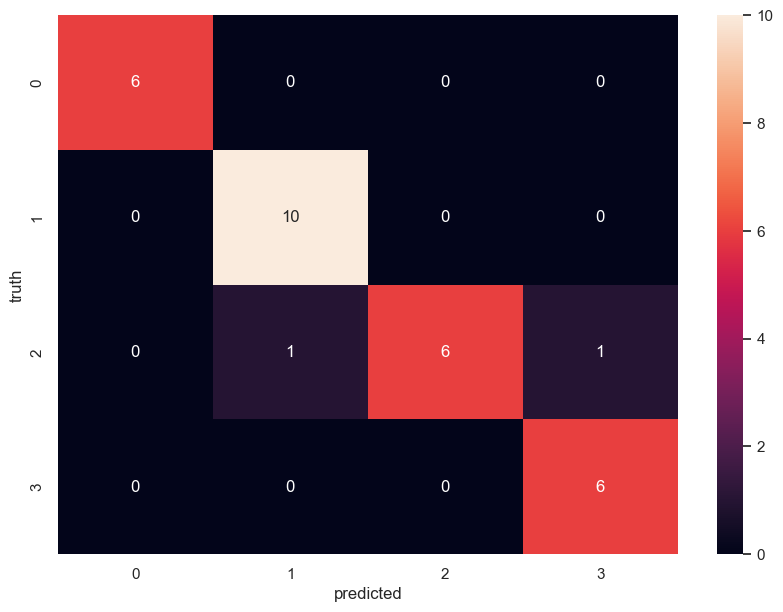

In [12]:
y_pred=classificationmodel.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")